**TIME SERIES ASSIGNMENT 2**

* Nomondalai Batjargal 
* March 15, 2023 

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

**1 Assume the 'robberies.csv' dataset from Brownlee Chapter 30:**

**a) Perform a Dickey-Fuller test on the series. Is the series stationary?**

In [2]:
import warnings
warnings.filterwarnings("ignore")

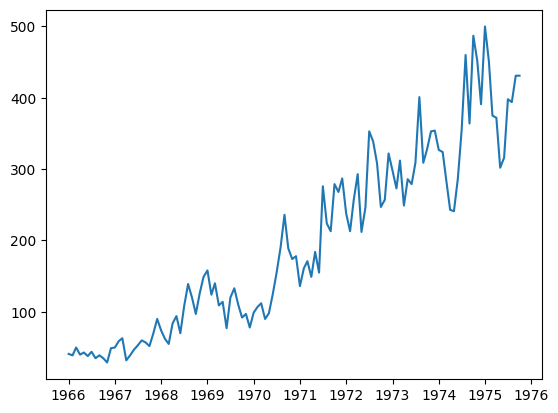

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing the data
series = pd.read_csv('robberies.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# Plot the time series
plt.plot(series)
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller

# Dickey-Fuller test
result = adfuller(series)

# Print test statistic and p-value
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.001102
p-value: 0.994278


The significance level aka p-value is greater than 0.05; therefore, we can't reject the null hypothesis. It is non stationary. 

**b) Detrend the series with a polynomial fit (up to order 3)**

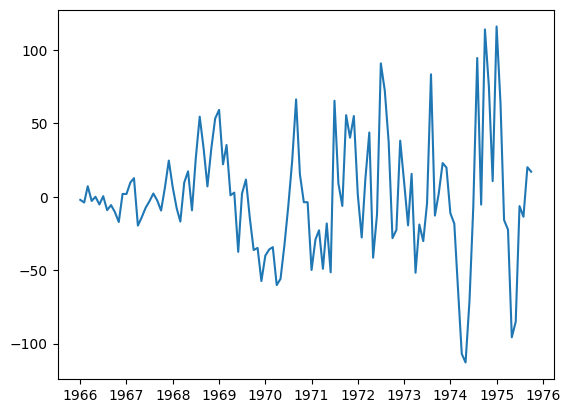

In [5]:
import numpy as np
from scipy.signal import detrend

# Detrend the series with a polynomial fit of order 3
trend = np.polyval(np.polyfit(series.index.astype(int), series.values, deg=3), series.index.astype(int))
detrended = series - trend

# Plot the detrended series
plt.plot(detrended)
plt.show()

**c) At what polynomial order does the detrended series become stationary?**

In [6]:
for order in range(11):
    trend = np.polyval(np.polyfit(series.index.astype(int), series.values, deg=order), series.index.astype(int))
    detrended = series - trend
    result = adfuller(detrended)
    print('Polynomial order %d: ADF Statistic: %f, p-value: %f' % (order, result[0], result[1]))

Polynomial order 0: ADF Statistic: 1.001102, p-value: 0.994278
Polynomial order 1: ADF Statistic: -1.682840, p-value: 0.439975
Polynomial order 2: ADF Statistic: -1.974430, p-value: 0.297896
Polynomial order 3: ADF Statistic: -2.076764, p-value: 0.253960
Polynomial order 4: ADF Statistic: -2.358678, p-value: 0.153740
Polynomial order 5: ADF Statistic: -2.410751, p-value: 0.138725
Polynomial order 6: ADF Statistic: -2.266067, p-value: 0.183146
Polynomial order 7: ADF Statistic: -2.624146, p-value: 0.088109
Polynomial order 8: ADF Statistic: -2.958003, p-value: 0.039007
Polynomial order 9: ADF Statistic: -2.958003, p-value: 0.039007
Polynomial order 10: ADF Statistic: -2.958003, p-value: 0.039007


The detrended series becomes stationary at polynomial order 8.

**d. Perform differencing on the original series to induce stationarity**

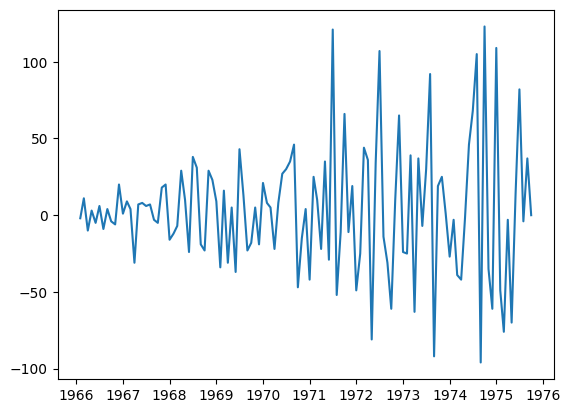

ADF Statistic: -7.428564
p-value: 0.000000


In [7]:
diff = series.diff().dropna()

# Plot the differenced series
plt.plot(diff)
plt.show()

# Perform Dickey-Fuller test on the differenced series
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

The p-value is less than 0.05; therefore, we can reject the null hypothesis of non-stationary and state that the differenced series is stationary.

**e) At what order of differencing does the series become stationary?**

In [8]:
for order_d in range(3):
    diff_d = series.diff(order_d).dropna()
    result_d = adfuller(diff_d)
    print('Order %d: ADF Statistic: %f, p-value: %f' % (order_d, result_d[0], result_d[1]))

Order 0: ADF Statistic: nan, p-value: nan
Order 1: ADF Statistic: -7.428564, p-value: 0.000000
Order 2: ADF Statistic: -3.132896, p-value: 0.024213


The series becomes stationary at order 1 differencing.

**2) Assume the 'champagne.csv' dataset from Brownlee Chapter 32:**

**a) Perform a Dickey-Fuller test on the series. Is the series stationary?**

In [9]:
data = pd.read_csv('champagne.csv')

In [26]:
# Create a date range starting from January 1975 with a monthly frequency
date_range = pd.date_range(start='1975-01', periods=len(data), freq='M')

# Set the date_range as the index of the DataFrame
data.index = date_range

# Perform the Dickey-Fuller test
result = adfuller(data['Sales'])

# Check for stationarity and print the result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.134662
p-value: 0.230807
Critical Values:
	1%: -3.514
	5%: -2.898
	10%: -2.586


 We can't reject the null hypothesis of non-stationarity, and the time series is non-stationary. This is because the ADF statistic of -2.134662 is greater than the critical value at the 5% level of -2.898 and the p-value of 0.230807 is greater than the significance level of 0.05.

**b)Perform seasonal differencing to eliminate seasonality**

In [27]:
# Perform seasonal differencing (assuming 12-month seasonality)
data['Seasonal_Difference'] = data['Sales'] - data['Sales'].shift(12)

# Drop NaN values created by differencing
data.dropna(inplace=True)

# Display the updated dataset with seasonal difference
print(data)

              Month  Sales  Seasonal_Difference
1976-01-31  1966-01   3113                572.0
1976-02-29  1966-02   3006                531.0
1976-03-31  1966-03   4047               1016.0
1976-04-30  1966-04   3523                257.0
1976-05-31  1966-05   3937                161.0
...             ...    ...                  ...
1982-05-31  1972-05   4618               -392.0
1982-06-30  1972-06   5312                438.0
1982-07-31  1972-07   4298               -335.0
1982-08-31  1972-08   1413               -246.0
1982-09-30  1972-09   5877                -74.0

[81 rows x 3 columns]


In [28]:
# Perform the Dickey-Fuller test on the seasonally differenced series
result = adfuller(data['Seasonal_Difference'])

# Check for stationarity and print the result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.045284
p-value: 0.000000
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586


the seasonally differenced series is stationary.

**c) Is the resulting series stationary?**

The resulting series is **stationary** because performing the Dickey Fuller test on the differenced series has p-value of 0.00000 which is less than the significance level of 0.05. Therefore, we can reject the null hypothesis of non stationary and conclude that the resulting series is stationary.

**d)Perform a seasonal decomposition on the original series and plot the results**

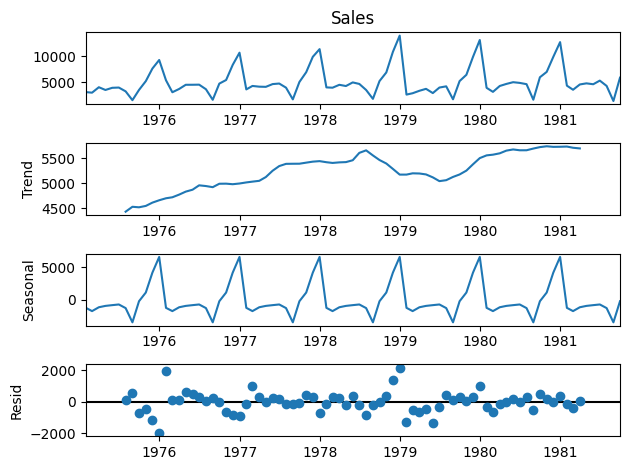

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Create a date range starting from January 1975 with a monthly frequency
date_range = pd.date_range(start='1975-01', periods=len(data), freq='M')

# Set the date_range as the index of the DataFrame
data.index = date_range

# Perform the seasonal decomposition
decomposition = seasonal_decompose(data['Sales'], model='additive')

# Plot the seasonal decomposition components
decomposition.plot()
plt.show()

**e) Plot a 1 year period (Jan-Dec) for only the seasonal component**

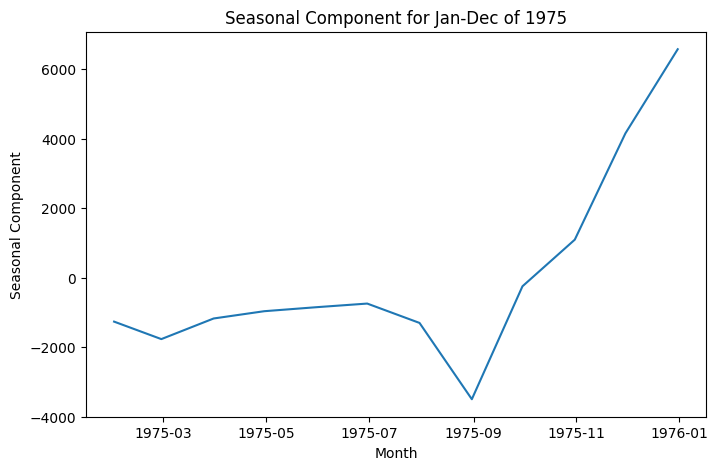

In [30]:
# Create a date range starting from January 1975 with a monthly frequency
date_range = pd.date_range(start='1975-01', periods=len(data), freq='M')

# Set the date_range as the index of the DataFrame
data.index = date_range

# Perform the seasonal decomposition
decomposition = seasonal_decompose(data['Sales'], model='additive')

# Plot the seasonal component for Jan-Dec of the first year
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(decomposition.seasonal['1975-01':'1975-12'])
plt.title('Seasonal Component for Jan-Dec of 1975')
plt.xlabel('Month')
plt.ylabel('Seasonal Component')
plt.show()

**3) Assume the 'series.csv' dataset:**

**a) Using ACF & PACF plots, estimate the ARMA(p,q) order**

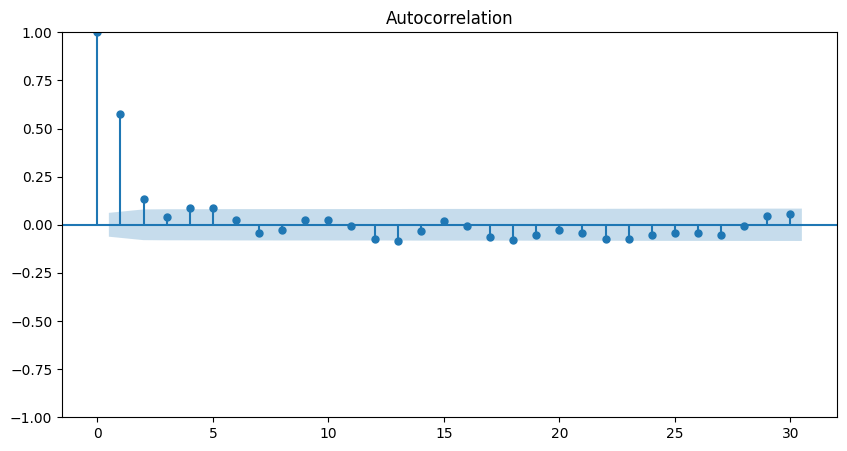

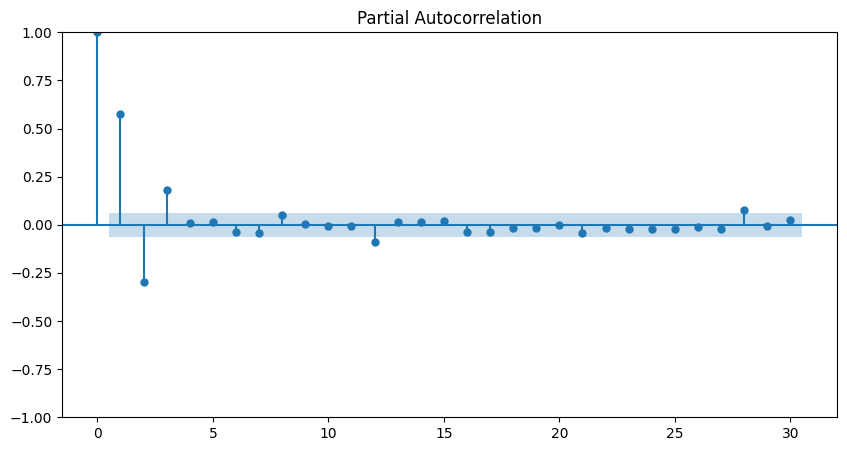

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
df = pd.read_csv('series-5.csv', header=None, names=['value'])

# Plot the ACF and PACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df.value, ax=ax, lags=30)
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df.value, ax=ax, lags=30)
plt.show()

The above proves that we can tentatively estimate the ARMA(p,q) order as (1,1), (1,2), (2,1), or (2,2), and to determine the best order, one must conduct further analysis and model fitting.

**b)Going with your answer for p, calculate the a1 - ap
 coefficients using the Yule-Walker equations**




In [32]:
# Load the dataset
df = pd.read_csv('series-5.csv', header=None, names=['value'])

# Calculate the autocorrelation at lag 1
rho_1 = df['value'].autocorr(lag=1)

# Calculate the variance of the time series
sigma_squared = np.var(df['value'])

# Calculate the first AR coefficient using the Yule-Walker equation
a_1 = rho_1 * sigma_squared / (1 - rho_1 ** 2)

# Print the first AR coefficient
print('a_1:', a_1)

a_1: 1.4998862179620631


AR coefficients: [    6.31247968   -38.39014055   233.57484695 -1420.31566049]


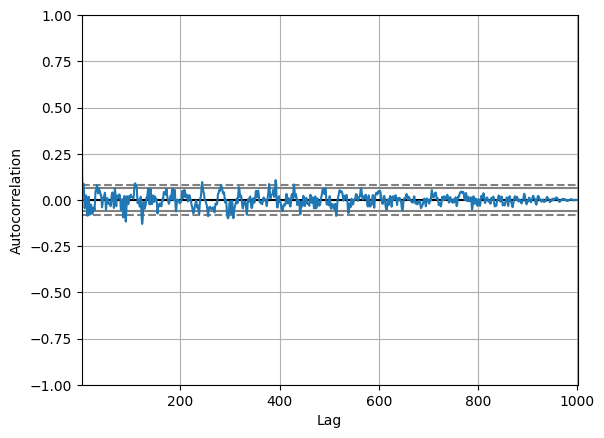

In [33]:
# Load the dataset
df = pd.read_csv('series-5.csv', header=None, names=['value'])

# Calculate the autocorrelation function (ACF)
acf = pd.plotting.autocorrelation_plot(df['value'])

# Calculate the autocorrelation at lags 1-4
rhos = [df['value'].autocorr(lag=i) for i in range(1, 5)]

# Construct the Yule-Walker matrix
M = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        M[i, j] = rhos[abs(i - j)]

# Calculate the determinant of the matrix
det_M = np.linalg.det(M)

# Calculate the coefficients using the Yule-Walker equations
a = np.zeros(4)
for i in range(4):
    b = np.zeros(i+1)
    for j in range(i):
        b[j] = a[j] * M[i-1, j]
    a[i] = (rhos[i] - np.sum(b)) / det_M

# Print the coefficients
print('AR coefficients:', a)

**4) The sunspot cycle is estimated at 11 years. Based on the ACF of the "Monthly Sunspots" dataset, 5 pts.
what is the sunspot cycle to the nearest month**

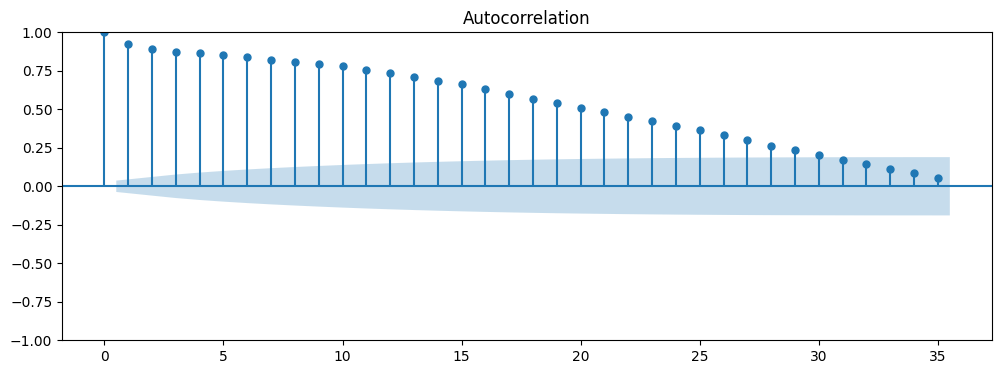

In [34]:
# Load the time series data
sunspots = pd.read_csv('Monthly Sunspots.csv', index_col='Month', parse_dates=True, squeeze=True)

# Plot ACF
fig, ax = plt.subplots(figsize=(12,4))
plot_acf(sunspots, ax=ax)
plt.show()

In [35]:
# Calculate sunspot cycle in years
sunspot_cycle_years = 11 / 12
print("Estimated sunspot cycle in years: {:.2f}".format(sunspot_cycle_years))

Estimated sunspot cycle in years: 0.92


In [36]:
# Convert sunspot cycle to months and round to nearest month
sunspot_cycle_months = round(1 / sunspot_cycle_years)

print("Estimated sunspot cycle to the nearest month: {} months".format(sunspot_cycle_months))

Estimated sunspot cycle to the nearest month: 1 months


The estimated sunspot cycle to the nearest month is 1 month.